<a href="https://colab.research.google.com/github/ravi2799/ML_PROJECTS/blob/main/Breast_cancer_prediction_using_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 40.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import plot_tree
import os


In [3]:
# Read data
import os
path  = r":\Users\Shree\Desktop\AI_PROJECT\Assignment2"
print(os.path.isdir(path))

False


In [2]:

data = pd.read_csv(r'breast_cancer_wisconsin.csv')

X = data.drop("Unnamed: 0",axis=1)
X = X.drop(columns = ['Class'])
y = data['Class']
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Precision Recall and Accuracy on Train set
              precision    recall  f1-score   support

           2       0.99      1.00      1.00       317
           4       1.00      0.99      0.99       161

    accuracy                           1.00       478
   macro avg       1.00      0.99      1.00       478
weighted avg       1.00      1.00      1.00       478

Precision Recall and Accuracy on Test set
              precision    recall  f1-score   support

           2       0.95      0.98      0.97       127
           4       0.97      0.92      0.95        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.96       205
weighted avg       0.96      0.96      0.96       205

Accurracy on Train: 0.99581589958159
Accurracy on Test: 0.9609756097560975


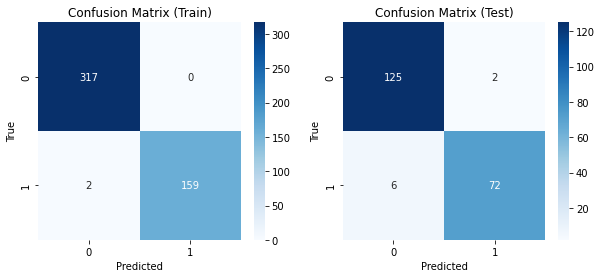

In [3]:
# Training
clf = DecisionTreeClassifier(criterion='entropy', max_depth=6)
clf.fit(X_train, y_train)

# prediction on training and testing data
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# calcculate performance metrics on traing and testing data

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Precision Recall and Accuracy on Train set")
print(classification_report(y_train, y_pred_train))

print("Precision Recall and Accuracy on Test set")
print(classification_report(y_test, y_pred_test))

print("Accurracy on Train:",accuracy_train)
print("Accurracy on Test:",accuracy_test)


# Plot confusion matrices
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')
ax[0].set_title('Confusion Matrix (Train)')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')
ax[1].set_title('Confusion Matrix (Test)')

plt.show()


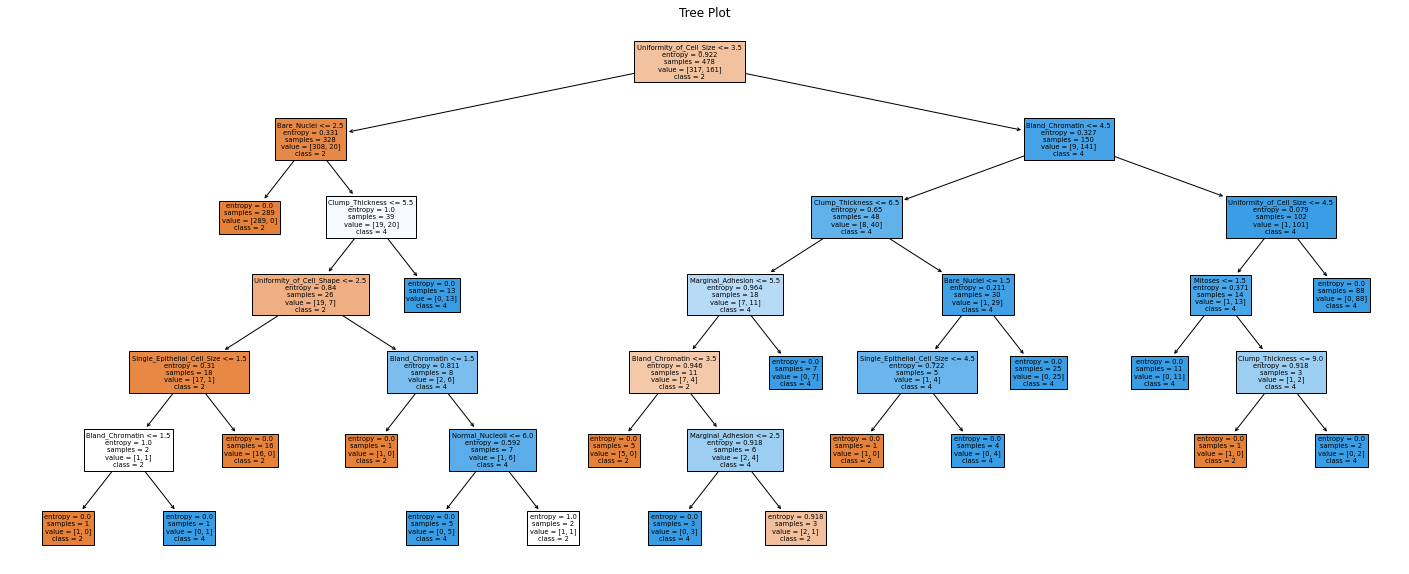

In [4]:
plt.figure(figsize=(25,10))
plot_tree(clf, feature_names = list(X), class_names = ['2','4'], filled = True)
plt.title('Tree Plot')
plt.show()

In [6]:
cost_functions = ['gini', 'entropy', 'log_loss']
max_depths = [2, 4, 6, 8, 10, 12]

results = []
for cost_func in cost_functions:
    for max_depth in max_depths:
        clf = DecisionTreeClassifier(criterion=cost_func, max_depth=max_depth, random_state=0)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append([cost_func, max_depth, acc])

print("Maximum accuracy is acheived by:",max(results))

Maximum accuracy is acheived by: ['log_loss', 12, 0.9658536585365853]




```
# This is formatted as code
```



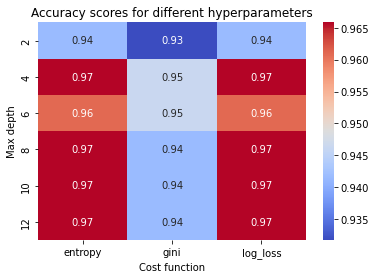

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(results, columns=['cost_function', 'max_depth', 'accuracy'])
pivot_table = df.pivot(index='max_depth', columns='cost_function', values='accuracy')

sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Accuracy scores for different hyperparameters')
plt.xlabel('Cost function')
plt.ylabel('Max depth')
plt.show()

               Classifier Entropy and Depth 4


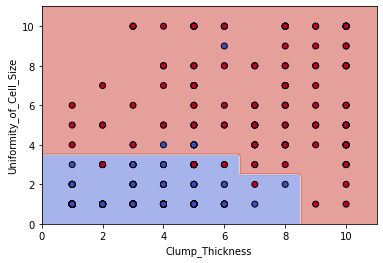

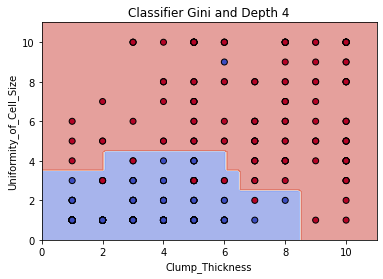

In [8]:
# Choosing the first 2 columns for the plot
X_train_cols = X_train.iloc[:, :2]

#fitting the tree classifier
classifier1   = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0).fit(X_train_cols, y_train)
classifier   = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0).fit(X_train_cols, y_train)

# Plotting the tree boundaries
disp1 = DecisionBoundaryDisplay.from_estimator(classifier, 
                                              X_train_cols, 
                                              response_method="predict",
                                              xlabel="Clump_Thickness", ylabel="Uniformity_of_Cell_Size",
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)
disp2 = DecisionBoundaryDisplay.from_estimator(classifier1, 
                                              X_train_cols, 
                                              response_method="predict",
                                              xlabel="Clump_Thickness", ylabel="Uniformity_of_Cell_Size",
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)
# Plotting the data points    
print(f"               Classifier Entropy and Depth 4")

disp1.ax_.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], 
                 c=y_train, edgecolor="k",
                 cmap=plt.cm.coolwarm)

plt.title(f"Classifier Gini and Depth 4")
disp2.ax_.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], 
                 c=y_train, edgecolor="k",
                 cmap=plt.cm.coolwarm)

plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


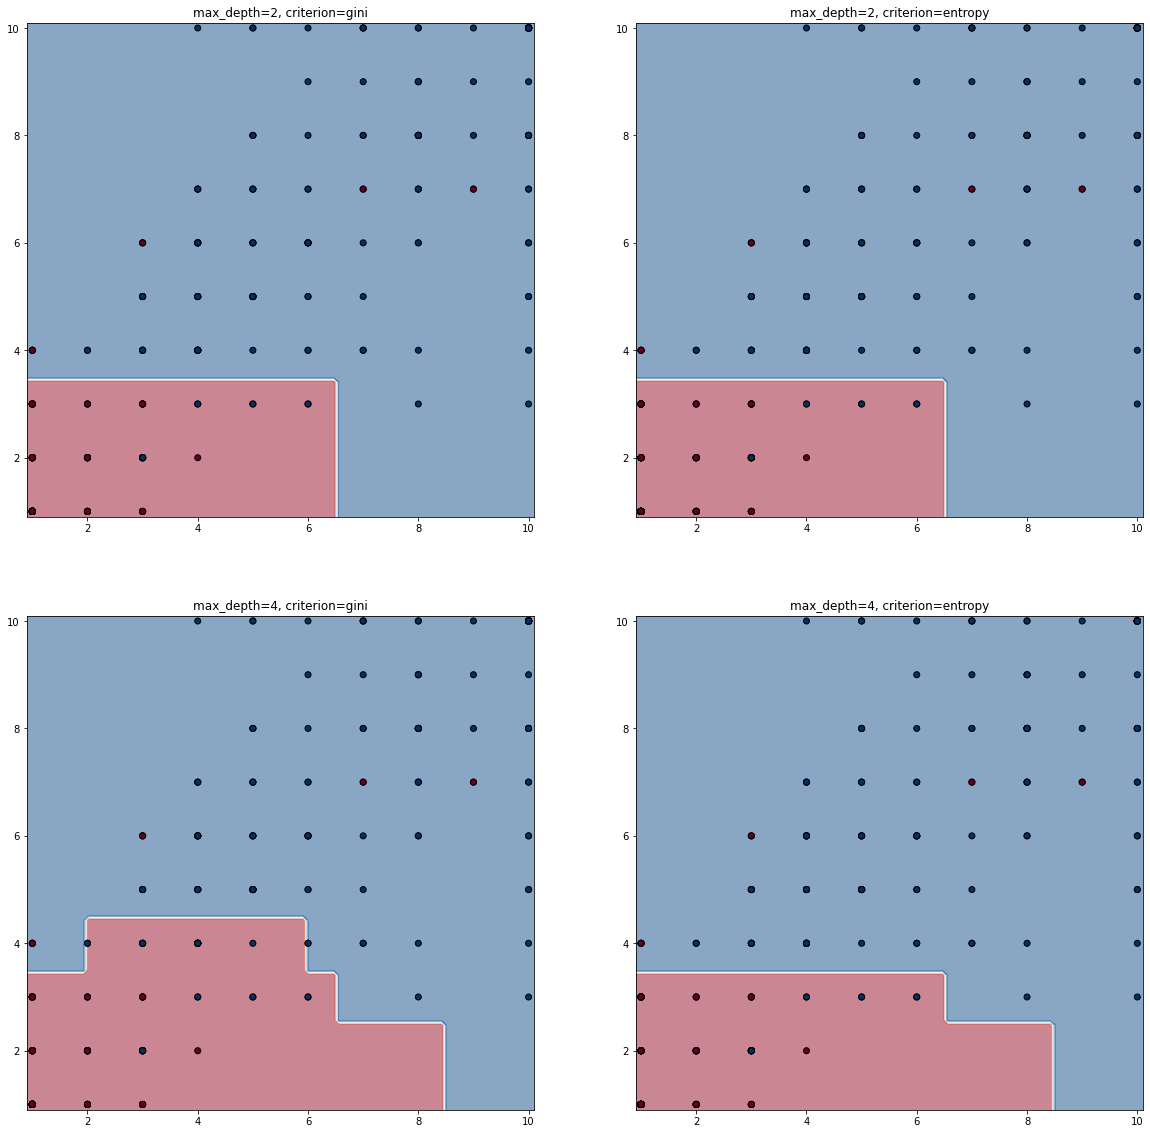

In [9]:
# Define the range of values for the hyperparameters
cost_functions = ['gini', 'entropy']
max_depths = [2, 4]

# Create a meshgrid of feature values for visualization
x_min, x_max = X_train.iloc[:, 0].min() - 0.1, X_train.iloc[:, 0].max() + 0.1
y_min, y_max = X_train.iloc[:, 1].min() - 0.1, X_train.iloc[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Train the decision tree classifier with different hyperparameters and plot the decision boundary
fig, axes = plt.subplots(nrows=len(max_depths), ncols=len(cost_functions), figsize=(20, 20))
for i, max_depth in enumerate(max_depths):
    for j, cost_function in enumerate(cost_functions):
        clf = DecisionTreeClassifier(criterion=cost_function, max_depth=max_depth, random_state=42)
        clf.fit(X_train.iloc[:, :2], y_train)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        axes[i][j].contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.5)
        axes[i][j].scatter(X_train.iloc[:, 1], X_train.iloc[:, 2], c=y_train, cmap=plt.cm.RdBu, edgecolor='k')
        axes[i][j].set_title("max_depth={}, criterion={}".format(max_depth, cost_function))
   
plt.show()